In [144]:
# Importamos las librerías que necesitamos

# Librerías de extracción de datos
# -----------------------------------------------------------------------

%load_ext autoreload
%autoreload 2

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px

import sys
sys.path.append('../')
from src import funciones as f
from src import soporte_prep as sp

import pandas as pd
import numpy as np


import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Parque Vehicular España

In [145]:
df_parque_vehicular_es = pd.read_excel("C:\\Users\\DELL\\Downloads\\Parque-de-vehiculos-Series-historicas-2023.xlsx", sheet_name='parque_ciclomotores', skiprows=2)

In [146]:
df_parque_vehicular_es.columns = ['anio', 'camiones_furgonetas', 'autobuses', 'turismos', 'motocicletas', 'tractores', 'remolques', 'otros', 'ciclomotores', 'total']

In [147]:
df_parque_vehicular_es.to_csv('../Datos/datos_plus/parque_vehicular_esp.csv')

In [272]:
df_parque_vehicular_es.tail()

,anio,camiones_furgonetas,autobuses,turismos,motocicletas,tractores,remolques,otros,ciclomotores,total
17,2019,5015973,65470,24558126,3607226,232680,487823,467493,1908492,36343283
18,2020,5030927,63387,24716898,3735920,235511,498492,484068,1891754,36656957
19,2021,5050416,64447,24940969,3866220,238456,512500,505800,1868056,37046864
20,2022,5075068,65377,25222554,4006804,245075,526546,527019,1842501,37510944
21,2023,5148231,66638,25356594,4162850,253334,540907,546684,1815623,37890861


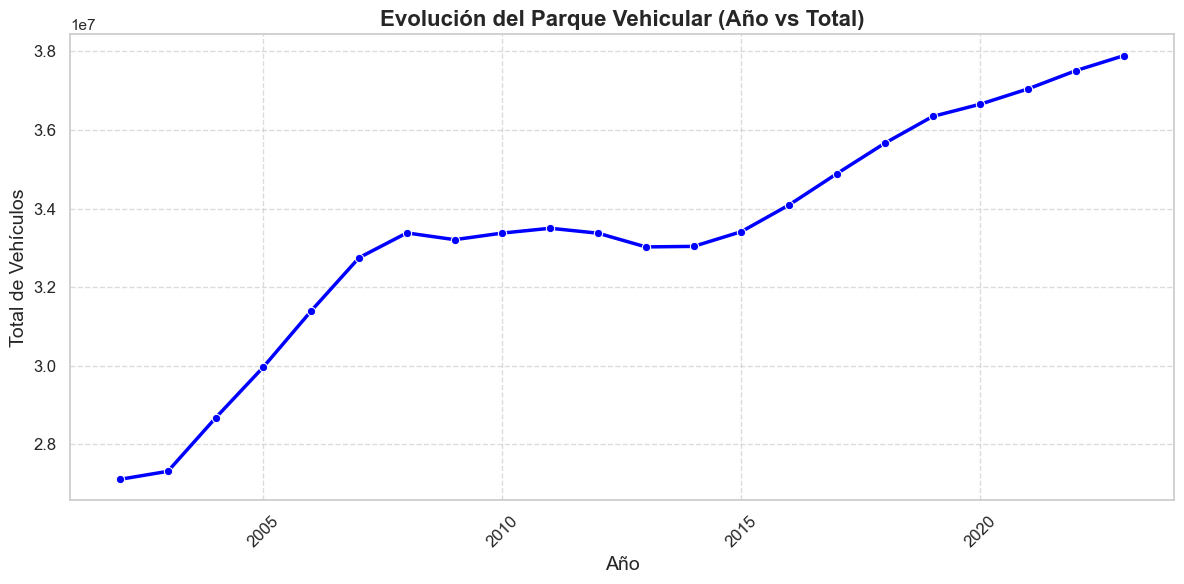

In [ ]:
# Configuración general de estilo
sns.set_theme(style="whitegrid")

# Crear la visualización
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.lineplot(x='anio', y='total', data=df_parque_vehicular_es, color="blue", marker="o", linewidth=2.5)

# Títulos y etiquetas
plt.title("Evolución del Parque Vehicular (Año vs Total)", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=14)
plt.ylabel("Total de Vehículos", fontsize=14)

# Personalización de ejes
plt.xticks(fontsize=12, rotation=45)  # Girar etiquetas en el eje X si es necesario
plt.yticks(fontsize=12)

# Líneas de cuadrícula ajustadas
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()


## Defunciones España

In [148]:
df_defunciones_es = pd.read_csv("C:\\Users\\DELL\\Downloads\\muertes_transito_espana.csv", sep=';')

In [180]:
df_defunciones_es.columns = ['anio', 'fallecidos']

In [181]:
df_defunciones_es.to_csv('../Datos/datos_plus/defunciones_esp.csv')

In [270]:
df_defunciones_es

,anio,fallecidos
0,2000,5776
1,2001,5517
2,2002,5347
3,2003,5399
4,2004,4741
5,2005,4442
6,2006,4104
7,2007,3823
8,2008,3100
9,2009,2714


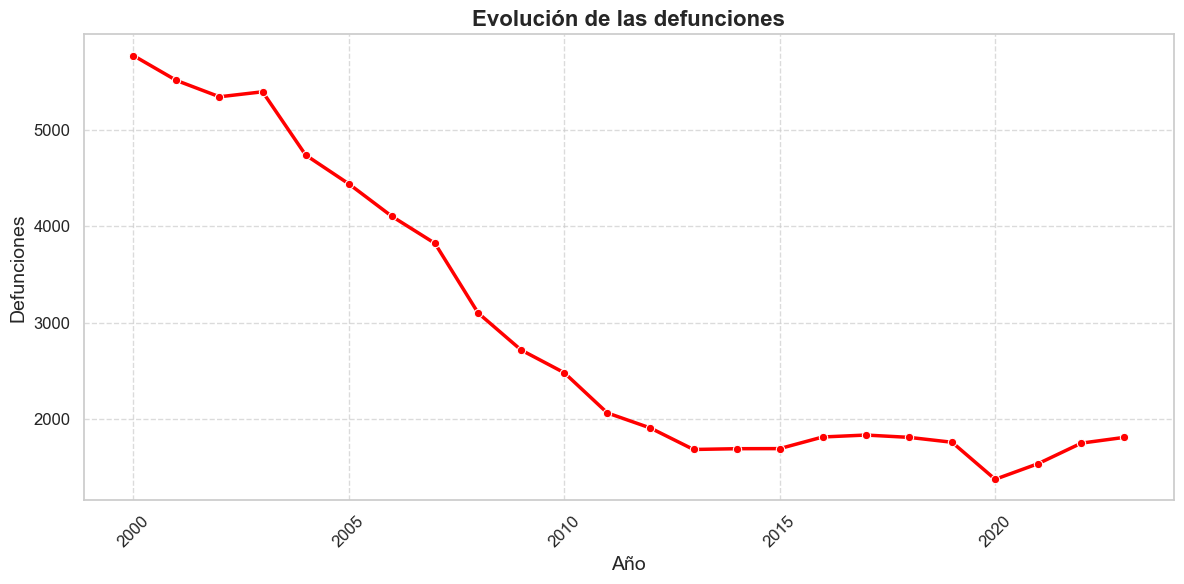

In [269]:
# Configuración general de estilo
sns.set_theme(style="whitegrid")

# Crear la visualización
plt.figure(figsize=(12, 6))  # Ajustar el tamaño de la figura
sns.lineplot(x='anio', y='fallecidos', data=df_defunciones_es, color="red", marker="o", linewidth=2.5)

# Títulos y etiquetas
plt.title("Evolución de las defunciones", fontsize=16, fontweight='bold')
plt.xlabel("Año", fontsize=14)
plt.ylabel("Defunciones", fontsize=14)

# Personalización de ejes
plt.xticks(fontsize=12, rotation=45)  # Girar etiquetas en el eje X si es necesario
plt.yticks(fontsize=12)

# Líneas de cuadrícula ajustadas
plt.grid(visible=True, linestyle="--", alpha=0.7)

# Mostrar gráfico
plt.tight_layout()
plt.show()


## Parque vehicular RD - Antiguedad

In [316]:
df_pvehicular_antiguo_rd = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='2.9', skiprows=9, index_col=0)

In [317]:
df_pvehicular_antiguo_rd.head()

,Año de Fabricación,Tipo de Vehículo,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Participación \n%,Unnamed: 12,Unnamed: 13,Unnamed: 14
NaN,NaN,Motocicletas,Automóviles,Jeeps,Carga,Autobuses,Máquinas Pesadas,Volteo,Otros,Total,NaN,NaN,NaN,NaN
NaN,2000a/,1169602,543452,92937,252007,54525,14435,13374,15138,2155470,0.37,NaN,NaN,NaN
NaN,2001,20732,25730,28700,15234,3159,841,743,574,95713,0.02,NaN,NaN,0.89
NaN,2002,28244,21865,29723,15052,5057,803,881,553,102178,0.02,NaN,NaN,NaN
NaN,2003,25871,18397,19079,11691,4125,429,792,418,80802,0.01,NaN,NaN,NaN


In [318]:
df_pvehicular_antiguo_rd = df_pvehicular_antiguo_rd.iloc[1:, :11]
df_pvehicular_antiguo_rd.columns = ['anio', 'motocicletas', 'automóviles', 'jeeps', 'carga', 'autobuses', 'máquinas_pesadas', 'volteo', 'otros', 'total', 'participacion %']

In [319]:
df_pvehicular_antiguo_rd.reset_index(drop=True, inplace=True)
df_pvehicular_antiguo_rd = df_pvehicular_antiguo_rd[df_pvehicular_antiguo_rd['motocicletas'].notnull()]
df_pvehicular_antiguo_rd['participacion %'] = df_pvehicular_antiguo_rd['participacion %'] * 100

In [320]:
df_pvehicular_antiguo_rd['anio'] = df_pvehicular_antiguo_rd['anio'].apply(lambda x: x.replace('a/', '') if 'a/' in str(x) else x)

In [321]:
df_pvehicular_antiguo_rd.sort_values(by='participacion %', ascending=False)[1:6]

,anio,motocicletas,automóviles,jeeps,carga,autobuses,máquinas_pesadas,volteo,otros,total,participacion %
0,2000,1169602,543452,92937,252007,54525,14435,13374,15138,2155470,37.09
15,2015,137948,47087,36744,11163,5980,490,182,365,239959,4.13
16,2016,124465,48158,44587,13258,5882,592,195,341,237478,4.09
17,2017,118017,37229,44357,11688,5334,760,366,317,218068,3.75
14,2014,109288,53738,36209,8872,5545,386,163,244,214445,3.69


Ten pendiente que no cargaste la columna porcentaje

In [322]:
df_pvehicular_antiguo_rd = df_pvehicular_antiguo_rd[:-1]

In [323]:
df_pvehicular_antiguo_rd_copia = df_pvehicular_antiguo_rd.copy()

In [324]:
df_pvehicular_antiguo_rd = df_pvehicular_antiguo_rd.iloc[:,:-1]

In [325]:
df_pvehicular_antiguo_rd.to_csv('../Datos/datos_plus/antiguedad_pvehicular.csv')

In [326]:
sencillo = df_pvehicular_antiguo_rd_copia[['anio', 'total', 'participacion %']]


In [327]:
s_col = df_pvehicular_antiguo_rd.columns.tolist()
df_pvehicular_antiguo_rd[s_col] = df_pvehicular_antiguo_rd[s_col].astype(float)

In [328]:
df_pvehicular_antiguo_rd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   anio              25 non-null     float64
 1   motocicletas      25 non-null     float64
 2   automóviles       25 non-null     float64
 3   jeeps             25 non-null     float64
 4   carga             25 non-null     float64
 5   autobuses         25 non-null     float64
 6   máquinas_pesadas  25 non-null     float64
 7   volteo            25 non-null     float64
 8   otros             25 non-null     float64
 9   total             25 non-null     float64
 10  participacion %   25 non-null     float64
dtypes: float64(11)
memory usage: 2.3 KB


In [331]:
df_pvehicular_antiguo_rd[df_pvehicular_antiguo_rd['anio'].between(2000, 2005)]['participacion %'].sum()

45.10591152333344

## Vehículos por género de su propietario por propietario privado - jurídico

In [250]:
df_pveh_genero_pais = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='2.5', skiprows=34, index_col=0)

In [251]:
df_pveh_genero_pais = df_pveh_genero_pais.dropna(how='all')

In [252]:
df_pveh_genero_pais = df_pveh_genero_pais.iloc[:,1:]

In [253]:
df_pveh_genero_pais.reset_index(drop=True, inplace=True)

In [254]:
df_pveh_genero_pais['Tipo'] = df_pveh_genero_pais['Tipo'].str.replace(r'\d+/.*', '', regex=True).str.strip()

In [255]:
df_pveh_genero_pais.columns = ['tipo', 'femenino', 'masculino', 'persona_juridica', 'total']

In [256]:
columnas_int = df_pveh_genero_pais.columns.tolist()[1:5]

In [257]:
df_pveh_genero_pais[columnas_int] = df_pveh_genero_pais[columnas_int].astype(int)

In [258]:
df_pveh_genero_pais = df_pveh_genero_pais.T[1:]
df_pveh_genero_pais.reset_index(inplace=True)
df_pveh_genero_pais.columns = ['propietario','motocicletas', 'automoviles', 'jeep', 'carga', 'autobuses', 'maquinas_pesadas', 'volteo', 'otros', 'total']
df_pveh_genero_pais = df_pveh_genero_pais[:-1]

In [259]:
df_pveh_genero_pais

,propietario,motocicletas,automoviles,jeep,carga,autobuses,maquinas_pesadas,volteo,otros,total
0,femenino,409307,302093,226092,40883,18414,1236,1746,959,1000734
1,masculino,1831819,693906,392251,297969,75255,10588,12703,7764,3322258
2,persona_juridica,1039891,126335,60125,182425,37021,15757,11095,15244,1487894


In [260]:
df_pveh_genero_pais.to_csv('../Datos/datos_plus/parquev_privado_publico.csv')

## Vehículos por género de su propietario por provincia

In [167]:
df_pveh_genero_rd_prov = pd.read_excel('C:\\Users\\DELL\\Downloads\\ParqueVehicular2023\\ParqueVehicular2023.xlsx', sheet_name='2.6', skiprows=7, index_col=0)

In [168]:
df_pveh_genero_rd_prov = df_pveh_genero_rd_prov[['Provincia', 'Género', 'Unnamed: 4', 'Total', 'Género.1', 'Unnamed: 11', 'Total.1']]

In [169]:
df_pveh_genero_rd_prov.columns = ['provincia', 'femenino', 'masculino', 'total', '%_fem', '%_masc', 'total_%']
df_pveh_genero_rd_prov = df_pveh_genero_rd_prov.iloc[1:]
df_pveh_genero_rd_prov = df_pveh_genero_rd_prov[df_pveh_genero_rd_prov['femenino'].notnull()]

In [170]:
df_pveh_genero_rd_prov.reset_index(drop=True, inplace=True)

In [185]:
df_pveh_genero_rd_prov['total'] = df_pveh_genero_rd_prov['total'].astype(int)

In [192]:
df_pveh_genero_rd_prov_copia = df_pveh_genero_rd_prov.copy()
df_pveh_genero_rd_prov = df_pveh_genero_rd_prov[['provincia', 'femenino', 'masculino', 'total']]

In [193]:
df_pveh_genero_rd_prov.to_csv('../Datos/datos_plus/parquev_genero_prov.csv')

In [195]:
df_pveh_genero_rd_prov_copia.head()

,provincia,femenino,masculino,total,%_fem,%_masc,total_%
0,Azua,11977,54694,66671,0.18,0.82,1.00
1,Bahoruco,3191,12020,15211,0.21,0.79,1.00
2,Barahona,10933,41140,52073,0.21,0.79,1.00
3,Dajabón,6001,16761,22762,0.26,0.74,1.00
4,Distrito Nacional,242930,891466,1134396,0.21,0.79,1.00
